In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import numpy as np
import pickle

In [4]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
nonzero_df = diabetes_df.loc[list((diabetes_df.Glucose > 0) & 
                                  (diabetes_df.BloodPressure > 0) & 
                                  (diabetes_df.BMI > 0)), :,]
nonzero_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
# Remove diabetes outcome target from features data
y = nonzero_df.Outcome.values
X = nonzero_df.drop(columns="Outcome").values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23) 

In [6]:
import matplotlib.pyplot as plt
X = diabetes_df.drop(columns="Outcome").values
X_df = pd.DataFrame(X)

In [7]:
for i in nonzero_df.columns.values:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


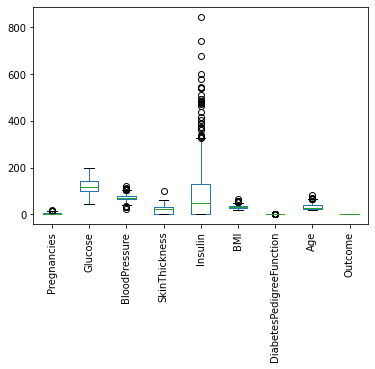

In [9]:
nonzero_df.plot.box()
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = [20,5]

Pregnancies
[15, 17, 14, 14]


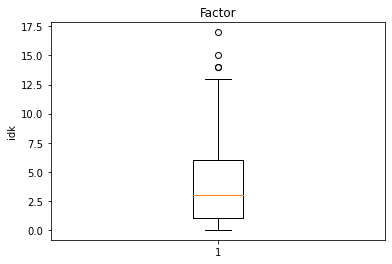

Glucose
[]


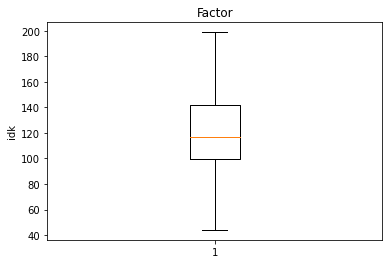

BloodPressure
[30, 110, 108, 122, 30, 110, 108, 110, 24, 38, 106, 106, 106, 114]


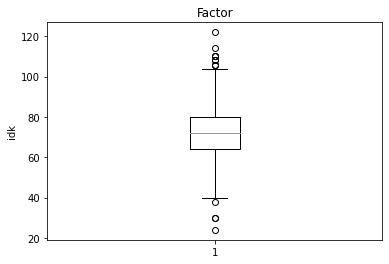

SkinThickness
[99]


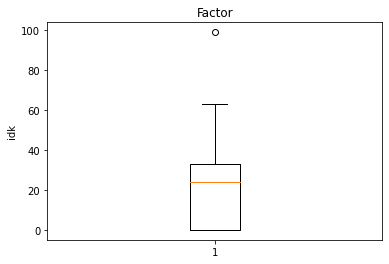

Insulin
[543, 846, 342, 495, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 465, 415, 579, 474, 328, 480, 330, 600, 440, 540, 480, 335, 387, 392, 510]


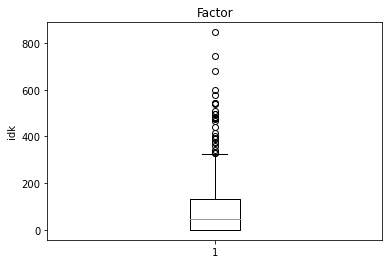

BMI
[53.2, 55.0, 67.1, 52.3, 52.9, 59.4, 57.3]


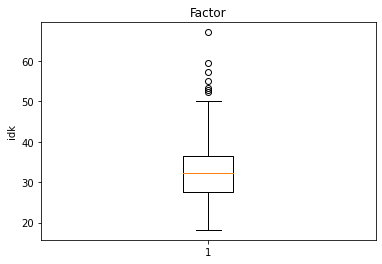

DiabetesPedigreeFunction
[2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]


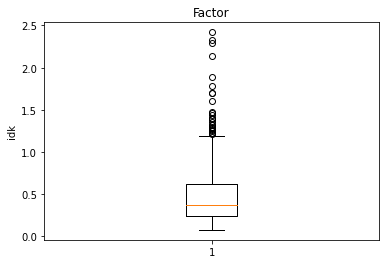

Age
[69, 67, 81, 67, 67, 70, 68]


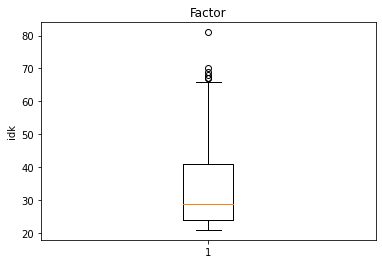

Outcome
[]


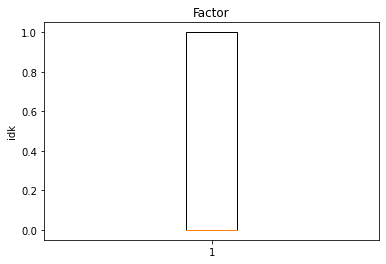

{'Pregnancies': (-6.5, 13.5),
 'Glucose': (36.375, 205.375),
 'BloodPressure': (40.0, 104.0),
 'SkinThickness': (-49.5, 82.5),
 'Insulin': (-195.75, 326.25),
 'BMI': (13.849999999999998, 50.25),
 'DiabetesPedigreeFunction': (-0.32875, 1.20125),
 'Age': (-1.5, 66.5),
 'Outcome': (-1.5, 2.5)}

In [8]:
outliers = []
bounds = {}

for i in nonzero_df.columns:
    
    factors = nonzero_df[i]
    fig1, ax1 = plt.subplots()
    ax1.set_title('Factor')
    ax1.set_ylabel('idk')
    ax1.boxplot(factors)
    print(i)
    quartiles = np.quantile(factors,[.25,.75])
    iqr = quartiles[1]-quartiles[0]
    lower_bound = quartiles[0]-(1.5*iqr)
    upper_bound = quartiles[1]+(1.5*iqr)
    bounds[i] = (lower_bound, upper_bound)
    potential_outliers = [i for i in factors if i < lower_bound or i > upper_bound]
    print(potential_outliers)
    plt.show()

bounds

In [ ]:
# We will not filter out any outliers from data set due to low number.  Do not want to overfit

In [11]:
nonzero_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
#Random Forest Classifier for non-zero values.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [17]:
X = nonzero_df.drop('Outcome', axis=1)
y = nonzero_df['Outcome'] != 1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7569060773480663


In [15]:
#Data with non-zero values give Testing Score of approximately 75.69%

In [20]:
# Checking feature importance to test dropping features to improve accuracy

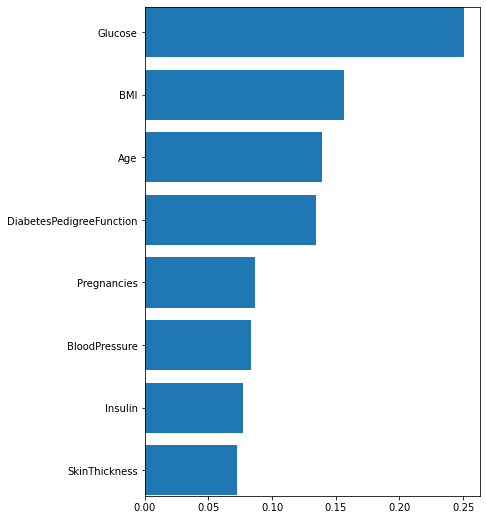

In [21]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,9)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
#Random Forest Classifier for non-zero values without Diabetes Pedigree Function

In [22]:
X2 = X.drop('DiabetesPedigreeFunction', axis=1)
y = nonzero_df['Outcome'] != 1

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7513812154696132


In [21]:
# Testing Score dropped approximately 0.55% from previous classifier model 
# which is quite insignificant. 
# We may be able to drop this category for future predictions. 

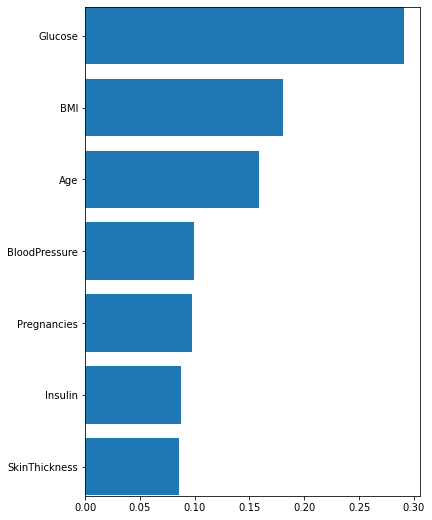

In [22]:
features = sorted(zip(X2.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,9)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [23]:
#Random Forest Classifier for outliers removed.

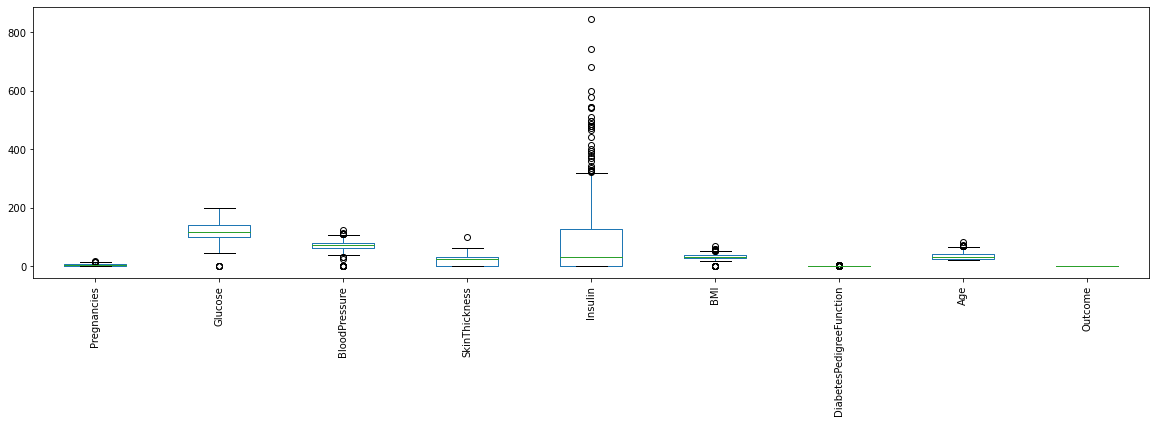

In [24]:
diabetes_df.plot.box()
plt.xticks(rotation = 90)
plt.rcParams['figure.figsize'] = [20,5]

In [25]:
from scipy import stats

z_scores = stats.zscore(diabetes_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
z_score_filtered_df = diabetes_df[filtered_entries]

z_score_filtered_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
z_score_filtered_df.count()

Pregnancies                 688
Glucose                     688
BloodPressure               688
SkinThickness               688
Insulin                     688
BMI                         688
DiabetesPedigreeFunction    688
Age                         688
Outcome                     688
dtype: int64

In [30]:
X = z_score_filtered_df.drop('Outcome', axis=1)
y = z_score_filtered_df['Outcome'] != 1

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.8023255813953488


In [30]:
#Highest testing score of all the models. This makes sense because 'noisy' outliers 
#were removed that would confuse models. Less realistic an prior data inputs.

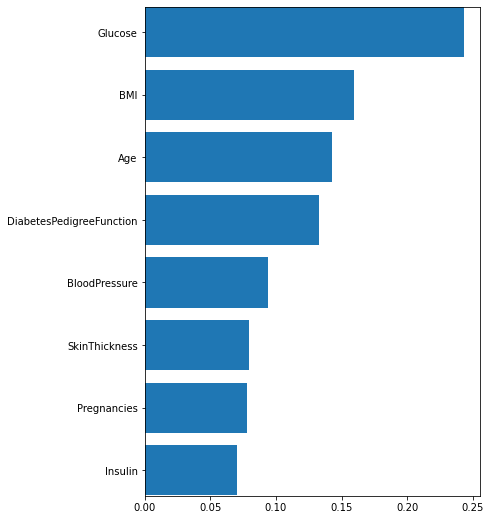

In [31]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,9)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [32]:
#Improve the model

In [33]:
from sklearn import svm
import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [36]:
# First create the base model to tune
rf = RandomForestRegressor()
# Rndom search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [37]:
clf = RandomForestClassifier(n_estimators=800, max_depth =90, min_samples_split =2, min_samples_leaf =4, max_features = 'sqrt').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9205426356589147
Testing Score: 0.7965116279069767


In [45]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [46]:
# First create the base model to tune
rf2 = RandomForestRegressor()
# Rndom search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf2_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [47]:
rf2_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [48]:
clf = RandomForestClassifier(n_estimators=900, max_depth =90, min_samples_split =2, min_samples_leaf =4, max_features = 'sqrt').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9186046511627907
Testing Score: 0.7848837209302325


In [ ]:
# trying again with different parameters

In [41]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [42]:
# First create the base model to tune
rf3 = RandomForestRegressor()
# Rndom search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf3_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 5, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf3_random.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=1)

In [43]:
rf3_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 110,
 'bootstrap': True}

In [44]:
clf = RandomForestClassifier(n_estimators=30, max_depth =110, min_samples_split =5, min_samples_leaf =4, max_features = 'log2').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9050387596899225
Testing Score: 0.7965116279069767


In [95]:
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 10, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [500, 750, 1000, 1250, 1500],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10,
  12,
  14,
  16,
  18,
  20,
  22,
  24,
  26,
  28,
  30,
  32,
  34,
  36,
  38,
  40,
  42,
  44,
  46,
  48,
  50,
  52,
  54,
  56,
  58,
  61,
  63,
  65,
  67,
  69,
  71,
  73,
  75,
  77,
  79,
  81,
  83,
  85,
  87,
  89,
  91,
  93,
  95,
  97,
  99,
  101,
  103,
  105,
  107,
  110,
  None],
 'min_samples_split': [1, 10, 20],
 'min_samples_leaf': [1, 5, 8],
 'bootstrap': [True, False]}

In [96]:
# First create the base model to tune
rf4 = RandomForestRegressor()
# Rndom search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf4_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf4_random.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Users\stefa\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 0.29884557  0.28803234         nan         nan  0.29077893  0.29901456
         nan         nan  0.29235448  0.29314431  0.29161803  0.14369368
         nan  0.30224353  0.28998308  0.09334114  0.29380238  0.29460643
  0.29522731  0.30113953         nan  0.29089635  0.29573662  0.29911531
  0.30078507         nan         nan  0.30177759  0.29050196  0.30355489
  0.28902046         nan         nan         nan  0.29939876         nan
         nan  0.29221203  0.28856782         nan  0.28775539  0.30020309
  0.29138053  0.29935349  0.30247672  0.29500519 -0.07083697  0.29310339
         nan  0.3006024          nan  0.29773272         nan  0.29890343
  0.30319078  0.29216912  0.29238387  0.2953327          nan         nan
  0.29563567  0.12848584  0.29395036  0.29503025  0.29311406  0.29808536
         nan  0.29949475  0.29304108  0.29574847      

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=150, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 14, 16, 18, 20,
                                                      22, 24, 26, 28, 30, 32,
                                                      34, 36, 38, 40, 42, 44,
                                                      46, 48, 50, 52, 54, 56,
                                                      58, 61, 63, 65, 67, 69, ...],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 8],
                                        'min_samples_split': [1, 10, 20],
                                        'n_estimators': [500, 750, 1000, 1250,
                                                         1500]},
                   random_state

In [97]:
rf4_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 93,
 'bootstrap': True}

In [98]:
clf = RandomForestClassifier(n_estimators=500, max_depth =79, min_samples_split =20, min_samples_leaf =5, max_features = 'log2').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8710865561694291
Testing Score: 0.7348066298342542


In [ ]:
# applying this model to dfs with dropped features

In [99]:
X3 = nonzero_df.drop(['DiabetesPedigreeFunction','Outcome'], axis=1)
y = nonzero_df['Outcome'] != 1
y

0      False
1       True
2      False
3       True
4      False
       ...  
763     True
764     True
765     True
766    False
767     True
Name: Outcome, Length: 724, dtype: bool

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
clf = RandomForestClassifier(n_estimators=500, max_depth =79, min_samples_split =20, min_samples_leaf =5, max_features = 'log2').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8674033149171271
Testing Score: 0.7403314917127072


In [ ]:
# Exporting our model 
# pickle.dump(classifier, output)
output = open('Diabetes_Risk_Model.pkl', 'wb')
pickle.dump(clf, output)

In [41]:
f = open('Diabetes_Risk_Model.pkl', 'rb')
classifier = pickle.load(f)
f.close()

In [42]:
print(f'Training Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Score: {classifier.score(X_test_scaled, y_test)}')

Training Score: 0.9205426356589147
Testing Score: 0.7965116279069767
